Падгружаем дадзеныя

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/

'My Drive'


In [0]:
!ls -l "/content/gdrive/My Drive/BSU/KannadaMnist"

total 128762
-rw------- 1 root root  18401187 Nov 19 13:04 Dig-MNIST.csv
-rw------- 1 root root     33899 Nov 19 13:04 sample_submission.csv
-rw------- 1 root root   8667163 Nov 19 13:04 test.csv
-rw------- 1 root root 104748945 Nov 19 13:04 train.csv


In [0]:
!cp "/content/gdrive/My Drive/BSU/KannadaMnist/train.csv" train.csv
!cp "/content/gdrive/My Drive/BSU/KannadaMnist/test.csv" test.csv

In [0]:
!ls

gdrive	sample_data  test.csv  train.csv


In [0]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
import tensorflow.keras as keras
print(keras.__version__)

1.15.0
2.2.4-tf


Дастаем дадзеныя для трэйна і валідацыі

In [0]:
import pandas as pd
train_set = pd.read_csv("train.csv")
print(type(train_set))
train_array = train_set.values
y_train, x_train = train_array[:, :1], train_array[:, 1:]
# print(y_train, y_train.shape,"\n", x_train, x_train.shape)
print(x_train.dtype, x_train.min(), x_train.max())


<class 'pandas.core.frame.DataFrame'>
int64 0 255


Дастаем дадзеныя для тэста


In [0]:
test_set = pd.read_csv("test.csv")
print(type(test_set))
test_array = test_set.values

y_test, x_test = test_array[:, :1], test_array[:, 1:]

<class 'pandas.core.frame.DataFrame'>


In [0]:
print(x_test)
print(x_test.max(), x_test.min())
print(y_test)
print(y_train)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
1.0 -1.0
[[   0]
 [   1]
 [   2]
 ...
 [4997]
 [4998]
 [4999]]
[[0]
 [1]
 [2]
 ...
 [7]
 [8]
 [9]]


Намалюем некалькі аб'ектаў

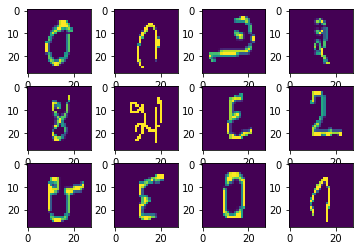

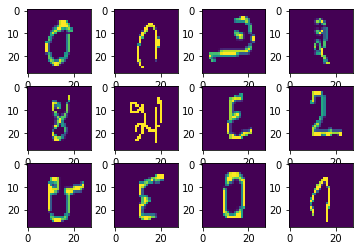

In [0]:
from skimage.io import imshow, imshow_collection

imshow_collection(x_train[:12].reshape(12, 28, 28))


Нармалізуем дадзеныя


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1, 1), False)
print(scaler.fit(x_train))
# print(scaler.data_max_)
x_train = scaler.transform(x_train)
# print(scaler.data_max_)
# print(x_train)
print(x_train.min(), x_train.max())


MinMaxScaler(copy=False, feature_range=(-1, 1))
-1.0 1.0
-1.0 1.0


Нармалізацыя для тэставых, але тут нейкая лухта


In [0]:
print(x_test.min(), x_test.max())
scaler = MinMaxScaler((-1, 1), False)
scaler.fit(x_test)
x_test = scaler.transform(x_test)
print(x_test.min(), x_test.max())

0 255
-1.0 1.0


Б'ем дадзеныя на трэйн і валідэйшн

In [0]:
x_train, x_valid, y_train, y_valid = x_train[:50000], x_train[50000:], y_train[:50000], y_train[50000:]

Вызначаем параметры мадэлі

In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import CSVLogger, ModelCheckpoint

x = Input(shape=(784,))
y = Dense(20, activation=None)(x)
y = Activation('elu')(y)
y = Dropout(rate=0.3)(y)
y = Dense(20, activation=None)(y)
y = Activation('elu')(y)
prediction = Dense(10, activation='softmax')(y)

model = Model(inputs=[x], output=[prediction])

model.compile(optimizer ='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_5 (Activation)    (None, 20)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_6 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  del sys.path[0]


In [0]:
model.fit(
    # x_train - 0.5, y_train,
          x_train, y_train,
          batch_size=16,
          epochs=20,
          verbose=1,
          # validation_data=(x_valid - 0.5, y_valid),
          validation_data=(x_valid, y_valid),
          callbacks=[
              CSVLogger('log.csv'),
              ModelCheckpoint('model.h5', save_best_only=True),
          ])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 121us/step - loss: 0.5155 - acc: 0.8395 - val_loss: 0.1119 - val_acc: 0.9683
Epoch 2/20
50000/50000 [==============================] - 6s 112us/step - loss: 0.2653 - acc: 0.9189 - val_loss: 0.1105 - val_acc: 0.9667
Epoch 3/20
50000/50000 [==============================] - 6s 113us/step - loss: 0.2296 - acc: 0.9286 - val_loss: 0.0979 - val_acc: 0.9731
Epoch 4/20
50000/50000 [==============================] - 6s 114us/step - loss: 0.2119 - acc: 0.9350 - val_loss: 0.0921 - val_acc: 0.9725
Epoch 5/20
50000/50000 [==============================] - 5s 106us/step - loss: 0.1974 - acc: 0.9399 - val_loss: 0.0982 - val_acc: 0.9710
Epoch 6/20
50000/50000 [==============================] - 5s 107us/step - loss: 0.1865 - acc: 0.9425 - val_loss: 0.0875 - val_acc: 0.9747
Epoch 7/20
50000/50000 [==============================] - 5s 107us/step - loss: 0.1795 - acc: 0.9438 - val_loss: 0.0876 - 

In [0]:
!ls


gdrive	log.csv  model.h5  sample_data	test.csv  train.csv


In [62]:
model = keras.models.load_model('model.h5')

# pred_probas = model.predict(x_test - 0.5, batch_size=16)
pred_probas = model.predict(x_test, batch_size=16)

prediction = pred_probas.argmax(axis=1)

In [0]:
from sklearn.metrics import accuracy_score

Бескарысная праверка на гэтым датасэце, бо y_test не мае сапраўднай разметкі

In [0]:
# accuracy_score(y_test, prediction)

0.0002

In [61]:
!cat log.csv


epoch,acc,loss,val_acc,val_loss
0,0.8395,0.5155130996188522,0.9683,0.11185427589416504
1,0.91886,0.26531369453549386,0.9667,0.11050195752456785
2,0.92858,0.2296367123568058,0.9731,0.09791627299226821
3,0.93504,0.21185728057041764,0.9725,0.09209404781088233
4,0.93992,0.19743387719094754,0.971,0.09823257425073534
5,0.94248,0.1865246699436009,0.9747,0.08752264567650854
6,0.9438,0.17954452091492712,0.9724,0.0875665807466954
7,0.94608,0.17192983256056904,0.9767,0.07551198994247244
8,0.94722,0.17005499748386443,0.9733,0.08868894231980666
9,0.9483,0.16409811073943972,0.9765,0.0764820150100626
10,0.9503,0.15812476480707527,0.9693,0.09192492479663342
11,0.95168,0.15607044981054963,0.9753,0.08511665614545345
12,0.9523,0.15179268700685353,0.975,0.08360209571253509
13,0.95126,0.15225655336536467,0.9789,0.06634147011656315
14,0.95392,0.14826682128883897,0.9784,0.06984598442595452
15,0.95358,0.14674477923892437,0.9775,0.07359305650717579
16,0.9549,0.14356840894330292,0.9789,0.07014972531106323
17,0.

In [0]:
from google.colab import files
files.download('model.h5') 
# files.download('prediction.csv') 

In [0]:
!cp "model.h5" "/content/gdrive/My Drive/BSU/KannadaMnist/model.h5"